In [56]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Read the dataset and do data pre-processing

In [57]:
#Reading the dataset
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Preprocessing

In [58]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [59]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


([<matplotlib.patches.Wedge at 0x7f64f6baaef0>,
 [Text(0.3888223589862547, 1.0289884222635182, 'High'),
  Text(-1.0563230795297933, -0.3068901296110612, 'Low'),
  Text(0.660462119378317, -0.8796532208014144, 'Normal')],
 [Text(0.21208492308341165, 0.5612664121437371, '38.5%'),
  Text(-0.576176225198069, -0.1673946161514879, '32.0%'),
  Text(0.3602520651154456, -0.4798108477098623, '29.5%')])

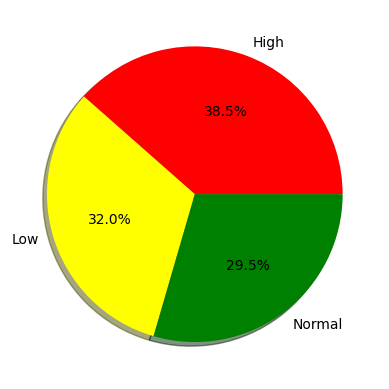

In [61]:
plt.pie(df.BP.value_counts(),labels=['High','Low','Normal'],colors = ['red','yellow','green'],shadow=True,autopct='%1.1f%%')

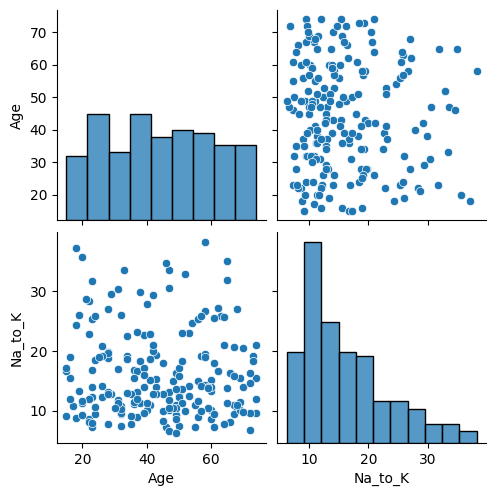

In [62]:
sns.pairplot(df)

<ipython-input-63-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

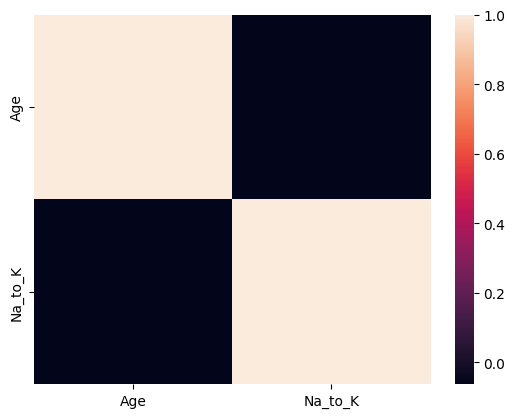

In [63]:
sns.heatmap(df.corr())

In [64]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [65]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

df['BP']=le.fit_transform(df['BP'])

df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [68]:
x=pd.get_dummies(df.iloc[:,1:5]).values
x

array([[ 0.   ,  0.   ,  0.   , 25.355],
       [ 1.   ,  1.   ,  0.   , 13.093],
       [ 1.   ,  1.   ,  0.   , 10.114],
       [ 0.   ,  2.   ,  0.   ,  7.798],
       [ 0.   ,  1.   ,  0.   , 18.043],
       [ 0.   ,  2.   ,  0.   ,  8.607],
       [ 0.   ,  2.   ,  0.   , 16.275],
       [ 1.   ,  1.   ,  0.   , 11.037],
       [ 1.   ,  2.   ,  0.   , 15.171],
       [ 1.   ,  1.   ,  1.   , 19.368],
       [ 0.   ,  1.   ,  0.   , 11.767],
       [ 0.   ,  0.   ,  1.   , 19.199],
       [ 1.   ,  1.   ,  0.   , 15.376],
       [ 0.   ,  1.   ,  0.   , 20.942],
       [ 0.   ,  2.   ,  0.   , 12.703],
       [ 0.   ,  0.   ,  1.   , 15.516],
       [ 1.   ,  1.   ,  1.   , 11.455],
       [ 1.   ,  0.   ,  0.   , 13.972],
       [ 1.   ,  1.   ,  0.   ,  7.298],
       [ 0.   ,  0.   ,  1.   , 25.974],
       [ 1.   ,  1.   ,  1.   , 19.128],
       [ 1.   ,  2.   ,  0.   , 25.917],
       [ 1.   ,  1.   ,  1.   , 30.568],
       [ 0.   ,  1.   ,  0.   , 15.036],
       [ 0.   , 

In [69]:
y=pd.get_dummies(df.iloc[:,5:]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)
xtrain

array([[ 0.   ,  0.   ,  1.   , 19.161],
       [ 1.   ,  1.   ,  0.   , 10.291],
       [ 1.   ,  1.   ,  0.   , 15.015],
       [ 0.   ,  2.   ,  0.   , 12.703],
       [ 0.   ,  0.   ,  1.   , 14.239],
       [ 0.   ,  0.   ,  1.   , 25.969],
       [ 1.   ,  1.   ,  0.   , 15.376],
       [ 1.   ,  1.   ,  1.   , 32.922],
       [ 1.   ,  1.   ,  1.   , 11.939],
       [ 0.   ,  1.   ,  0.   , 33.486],
       [ 1.   ,  2.   ,  0.   , 15.171],
       [ 0.   ,  2.   ,  0.   , 19.221],
       [ 0.   ,  0.   ,  0.   , 37.188],
       [ 1.   ,  2.   ,  1.   ,  7.845],
       [ 0.   ,  2.   ,  1.   ,  8.107],
       [ 1.   ,  0.   ,  1.   ,  8.621],
       [ 0.   ,  0.   ,  1.   , 31.876],
       [ 1.   ,  1.   ,  0.   ,  8.151],
       [ 0.   ,  0.   ,  1.   , 15.516],
       [ 0.   ,  1.   ,  0.   , 11.567],
       [ 1.   ,  1.   ,  1.   , 20.693],
       [ 0.   ,  2.   ,  0.   , 16.275],
       [ 0.   ,  1.   ,  1.   , 11.349],
       [ 0.   ,  0.   ,  1.   , 12.495],
       [ 1.   , 

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [72]:
#Bulid a ANN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Classification

In [73]:
#intialize the sequence model
cla_model=Sequential()
#adding the input layer to the model
cla_model.add(Dense(5,activation='relu'))
#adding the 1st hidden layer to the model
cla_model.add(Dense(64,activation='relu'))
#adding the 2st hidden layer to the model
cla_model.add(Dense(32,activation='relu'))
#adding the 3st hidden layer to the model
cla_model.add(Dense(24,activation='relu'))
#adding output layer
cla_model.add(Dense(5,activation='softmax'))

In [74]:
# Compiling the skeleton with loss and gradient decent
cla_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
# Training the model
cla_model.fit(xtrain,ytrain,batch_size=4,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 1.2065 - accuracy: 0.5000 - val_loss: 1.1820 - val_accuracy: 0.4250
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.5813 - val_loss: 1.0879 - val_accuracy: 0.6250
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.9821 - accuracy: 0.6438 - val_loss: 1.1146 - val_accuracy: 0.5250
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.9193 - accuracy: 0.6438 - val_loss: 0.9288 - val_accuracy: 0.6750
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.8320 - accuracy: 0.6812 - val_loss: 0.8192 - val_accuracy: 0.6500
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7789 - accuracy: 0.6750 - val_loss: 0.7730 - val_accuracy: 0.6750
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7301 - accuracy: 0.6812 - val_loss: 0.8233 - val_accuracy: 0.6500
Epoch 8/10
40/40 [==

Regression

In [76]:
# Initializing the seq model
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(4,activation='relu'))
# Adding the 1st hidden layer to the model
reg_model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(24,activation='relu'))
# Adding the 3nd hidden layer to the model
reg_model.add(Dense(32,activation='relu'))
# Adding output layer
reg_model.add(Dense(1,activation='linear')) 

In [77]:
# Compiling the skeleton with loss and gradient decent

reg_model.compile(optimizer='adam',loss='mse')

In [ ]:
# Training the model

reg_model.fit(xtrain,ytrain,batch_size=4,epochs=10)

Epoch 1/10


In [ ]:
#testing the model
ypredict=reg_model.predict(xtest)
comp=pd.DataFrame(ypredict)
comp.columns=['Actual Values']
comp['Predicted Values']=ypredict
comp

Task 3: Test the model with random data

In [ ]:
#prediction
reg_model.predict([[324234,4545455,232323,2]])